# Imports and Functions

In [2]:
import os
#only print error messages from tensorflow
import tensorflow as tf
import numpy as np
import math
import time
import pickle
import bz2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler
import copy
from sklearn.metrics import mean_squared_error,mean_absolute_error
import scipy.optimize as opt
from itertools import chain

In [3]:
#https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m

### Check Actual Data

In [91]:
 print("loading data...")
in_file = bz2.BZ2File("./generated_data/full_generated_data.bz2",'rb')
data = pickle.load(in_file)
in_file.close()

print("data loaded.")

x_train = np.asarray(data[0])
y_train = np.asarray(data[1])
x_test = np.asarray(data[2])
y_test = np.asarray(data[3])

loading data...
data loaded.


In [92]:
indx = 4

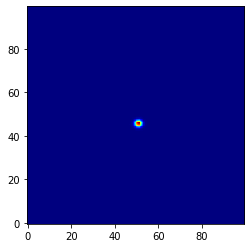

In [93]:
fig, ax = plt.subplots(1, 1)
ax.imshow(x_train[indx].reshape(100, 100), cmap=plt.cm.jet, origin='lower')
plt.show()

In [94]:
y_train[indx]

array([   92.71517578, 71718.81843113])

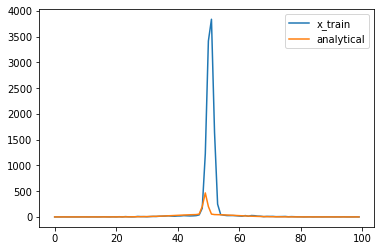

In [95]:
x = np.linspace(-49, 50, 100)
y = np.linspace(-49, 50, 100)
x, y = np.meshgrid(x, y)
length = 100

analytical_for_x_train_im = analytical_eq((x,y),0,0,y_train[indx][1],y_train[indx][0])
analytical_for_x_train_im = np.reshape(analytical_for_x_train_im,(length,length))

plt.plot(np.arange(len(x_train[indx])),x_train[indx,row],label = "x_train")
plt.plot(np.arange(len(x_train[indx])),analytical_for_x_train_im[row],label = "analytical")
plt.legend()

In [ ]:
# temp mse: 10.220974809607364
# atoms mse: 235086.60269962501
# temp rmse: 3.197025931957288
# atoms rmse: 484.8573013780704
# temp mae: 2.272125123170204
# atoms mae: 267.91944761821696

### Functions

In [62]:
def analytical_eq(xy,xo,yo,No,T):   
    x, y = xy
    
    Nex = 100000-No
    
    out = (No/math.pi)*np.exp(-(x-xo)**2)*np.exp(-(y-yo)**2) + (Nex/(2*math.pi*T))*np.exp((-(x-xo)**2)/(2*T))*np.exp((-(y-yo)**2)/(2*T))
    # out = (Nex/(2*math.pi*T))*np.exp((-(x-xo)**2)/(2*T))*np.exp((-(y-yo)**2)/(2*T))

    # out = (out - np.min(out)) / np.max(out)
    return out.ravel()

In [5]:
num_atoms = 100000
length = 100
dimensions = 2
        
        
def generate_image(length,num_atoms,dimensions,temp):
    '''
    generate image using sampling
    '''

    x_list = []
    y_list = []
    
    trans_temp = (num_atoms/(2*1*1.645))**(1/dimensions)
    # temp = np.random.uniform(trans_temp//2,int(trans_temp*2))  
    temp_ratio = temp/trans_temp

    num_BEC_atoms = 0
    if temp < trans_temp:
        num_BEC_atoms = num_atoms*(1-(temp/trans_temp)**dimensions)
        
    count = 0
    
    for i in range(num_atoms):
        probability = np.random.rand()
        if temp_ratio >1 :
            temp_ratio = 1
        BEC_probability = (1-(temp_ratio)**dimensions)
        if probability <= BEC_probability:
            count += 1
            x_list.append(np.random.normal(0,math.sqrt(1/2)))
            y_list.append(np.random.normal(0,math.sqrt(1/2)))

        else:
            x_list.append(np.random.normal(0,math.sqrt(temp)))
            y_list.append(np.random.normal(0,math.sqrt(temp)))



    hist = np.histogram2d(x_list,y_list,length,range = [(-49,50),(-49,50)])[0]
    hist = hist.tolist()
    return hist,temp,num_BEC_atoms,count

### Low Temp

In [59]:
test_im_count = 100
test_ims = []
labs = []

temp = 50


for i in range(test_im_count):
    curr_im, t, n, count = generate_image(length,num_atoms,dimensions,temp)
    
    test_ims.append(np.asarray(curr_im))
    labs.append((t,n,count))

test_ims = np.stack(test_ims)
labs = np.stack(labs)

In [60]:
mean_test_im = np.mean(test_ims,axis = 0)

In [66]:
std_err = np.std(test_ims,axis = 0)/np.sqrt(test_im_count)

In [67]:
num_atoms = 100000
dimensions = 2

x = np.linspace(-49, 50, 100)
y = np.linspace(-49, 50, 100)
x, y = np.meshgrid(x, y)


trans_temp = (num_atoms/(2*1*1.645))**(1/dimensions)
num_BEC_atoms = 0
if temp < trans_temp:
    num_BEC_atoms = num_atoms*(1-(temp/trans_temp)**dimensions)

analytical = analytical_eq((x,y),0,0,num_BEC_atoms,temp)

In [68]:
analytical = np.reshape(analytical,(length,length))

Text(0.5, 1.0, 'Low Temp')

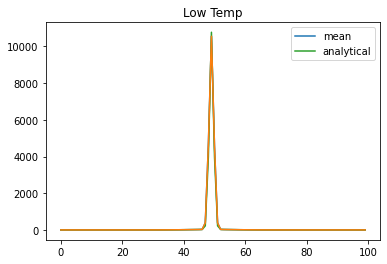

In [69]:
#mean gaussian

row = 50

plt.plot(np.arange(len(mean_test_im[0])),mean_test_im[row],label = "mean")
plt.errorbar(np.arange(len(mean_test_im[0])),mean_test_im[row],yerr = std_err[row])
plt.plot(np.arange(len(mean_test_im[0])),analytical[row],label = "analytical")
plt.legend()
plt.title("Low Temp")

### Medium Temp

In [12]:
test_im_count = 100
test_ims = []
labs = []

temp = 170


for i in range(test_im_count):
    curr_im, t, n, count = generate_image(length,num_atoms,dimensions,temp)
    
    test_ims.append(np.asarray(curr_im))
    labs.append((t,n,count))

test_ims = np.stack(test_ims)
labs = np.stack(labs)

In [13]:
mean_test_im = np.mean(test_ims,axis = 0)

In [14]:
std_err = np.std(test_ims,axis = 0)/np.sqrt(test_im_count)

In [15]:
num_atoms = 100000
dimensions = 2

x = np.linspace(-49, 50, 100)
y = np.linspace(-49, 50, 100)
x, y = np.meshgrid(x, y)


trans_temp = (num_atoms/(2*1*1.645))**(1/dimensions)
num_BEC_atoms = 0
if temp < trans_temp:
    num_BEC_atoms = num_atoms*(1-(temp/trans_temp)**dimensions)

analytical = analytical_eq((x,y),0,0,num_BEC_atoms,temp)

In [16]:
analytical = np.reshape(analytical,(length,length))

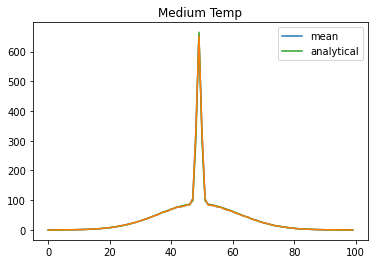

In [17]:
#mean gaussian

row = 50

plt.plot(np.arange(len(mean_test_im[0])),mean_test_im[row],label = "mean")
plt.errorbar(np.arange(len(mean_test_im[0])),mean_test_im[row],yerr = std_err[row])
plt.plot(np.arange(len(mean_test_im[0])),analytical[row],label = "analytical")
plt.title("Medium Temp")
plt.legend()

### High temp

In [77]:
test_im_count = 100
test_ims = []
labs = []

temp = 200


for i in range(test_im_count):
    curr_im, t, n, count = generate_image(length,num_atoms,dimensions,temp)
    
    test_ims.append(np.asarray(curr_im))
    labs.append((t,n,count))

test_ims = np.stack(test_ims)
labs = np.stack(labs)

In [78]:
mean_test_im = np.mean(test_ims,axis = 0)

In [79]:
std_err = np.std(test_ims,axis = 0)/np.sqrt(test_im_count)

In [80]:
num_atoms = 100000
dimensions = 2

x = np.linspace(-49, 50, 100)
y = np.linspace(-49, 50, 100)
x, y = np.meshgrid(x, y)


trans_temp = (num_atoms/(2*1*1.645))**(1/dimensions)
num_BEC_atoms = 0
if temp < trans_temp:
    num_BEC_atoms = num_atoms*(1-(temp/trans_temp)**dimensions)

analytical = analytical_eq((x,y),0,0,num_BEC_atoms,temp)

In [81]:
analytical = np.reshape(analytical,(length,length))

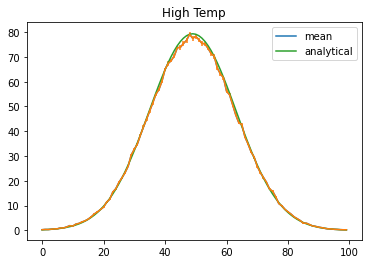

In [83]:
#mean gaussian

row = 50

plt.plot(np.arange(len(mean_test_im[0])),mean_test_im[row],label = "mean")
plt.errorbar(np.arange(len(mean_test_im[0])),mean_test_im[row],yerr = std_err[row])
plt.plot(np.arange(len(mean_test_im[0])),analytical[row],label = "analytical")
plt.title("High Temp")
plt.legend()

# Checking Variances

If you want to run these cells to make sure that the variance of the Gaussians these functions produce are correct, you need to change the generate image function so that it only produces images with one temperature.

In [ ]:
test_ims.shape

In [ ]:
mean_test_im = np.mean(test_ims,axis = 0)

In [ ]:
summ_all_mean = np.sum(mean_test_im)
summ_all_mean

In [ ]:
pxy = mean_test_im/summ_all_mean
px = np.sum(pxy,axis = 1)
res = px * np.linspace(-49, 50, 100)
expected_val_x = np.sum(res)
expected_val_x2 = np.sum(px * np.linspace(-49, 50, 100) ** 2)

In [ ]:
np.sum(px)

In [ ]:
expected_val_x

In [ ]:
expected_val_x2

In [ ]:
var_sampling = expected_val_x2 - expected_val_x**2

In [ ]:
num_atoms = 100000
dimensions = 2
# temp = 300

trans_temp = (num_atoms/(2*1*1.645))**(1/dimensions)
num_BEC_atoms = num_atoms*(1-(temp/trans_temp)**dimensions)

actual = analytical_eq((x,y),0,0,num_BEC_atoms,temp)

In [ ]:
summ_actual = np.sum(actual)
summ_actual

In [ ]:
pxy_actual = actual/summ_actual
px_actual = np.sum(pxy_actual,axis = 1)
res = px_actual * np.linspace(-49, 50, 100)
expected_val_x_actual = np.sum(res)
expected_val_x2_actual = np.sum(px_actual * np.linspace(-49, 50, 100) ** 2)

In [ ]:
expected_val_x_actual

In [ ]:
expected_val_x2_actual

In [ ]:
var_actual = expected_val_x2_actual - expected_val_x_actual**2
var_actual

In [ ]:
# length = 100
# actual = np.reshape(actual,(length,length))
# actual.shape

In [ ]:
print(var_sampling,var_actual)

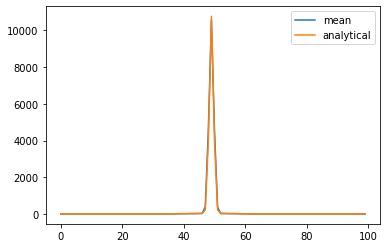

In [395]:
#mean gaussian

row = 50

plt.plot(np.arange(len(mean_test_im[0])),mean_test_im[row],label = "mean")
# plt.errorbar(np.arange(len(mean_test_im[0])),mean_test_im[row],yerr = std_err[row])
plt.plot(np.arange(len(mean_test_im[0])),actual[row],label = "analytical")
plt.legend()

# Curve Fitting

In [73]:
#reload data

print("loading data...")
in_file = bz2.BZ2File("./generated_data/full_generated_data.bz2",'rb')
data = pickle.load(in_file)
in_file.close()

print("data loaded.")

x_train = np.asarray(data[0])
y_train = np.asarray(data[1])
x_test = np.asarray(data[2])
y_test = np.asarray(data[3])

loading data...
data loaded.


In [74]:
x = np.linspace(-49, 50, 100)
y = np.linspace(-49, 50, 100)
x, y = np.meshgrid(x, y)

initial_guess = (0,0,100000,100)
preds = []
origins = []
for i,im in enumerate(x_test):
    popt, _ = opt.curve_fit(analytical_eq, (x, y), im.ravel(), p0=initial_guess,maxfev = 5000)
    xo,yo = popt[:2]
    pred_No = popt[2]
    pred_T = popt[3]
    if pred_No < 0:
        pred_No = 0
    if pred_T < 0:
        pred_T = 0
    preds.append((pred_T,pred_No))
    origins.append((xo,yo))
        
preds = np.asarray(preds)

In [75]:
x_scaler = MinMaxScaler(feature_range = (0,1))

tmp_x_test = copy.copy(x_test)

x_train = [x_scaler.fit_transform(x_train[i]) for i in range(len(x_train))]
x_test = [x_scaler.fit_transform(x_test[i]) for i in range(len(x_test))]

tmp_y_test = copy.copy(y_test)

#scale labels to be between 0 and 1
y_scaler = MinMaxScaler(feature_range = (0,1))
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.fit_transform(y_test)



ml_model = tf.keras.models.load_model('../../big_models/BEC_model_conv')

In [76]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [77]:
x_test.shape

(4000, 100, 100)

In [78]:
ml_preds = ml_model.predict(x_test)
ml_preds = y_scaler.inverse_transform(ml_preds)

 13/125 [==>...........................] - ETA: 1s

2023-03-13 14:03:10.725702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 8ms/step


In [79]:
# for i,im in enumerate(tmp_y_test):
#     if im[0] < 100:
#         print(i)


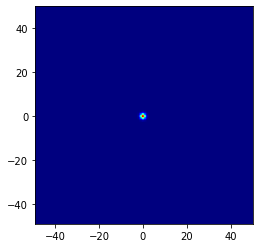

In [80]:
check_indx = 9

data_fitted = analytical_eq((x, y), *origins[check_indx],*preds[check_indx][::-1])

fig, ax = plt.subplots(1, 1)
ax.imshow(tmp_x_test[check_indx].reshape(100, 100), cmap=plt.cm.jet, origin='lower',
    extent=(x.min(), x.max(), y.min(), y.max()))
# ax.contour(x, y, data_fitted.reshape(100, 100),10, colors='w')
plt.show()

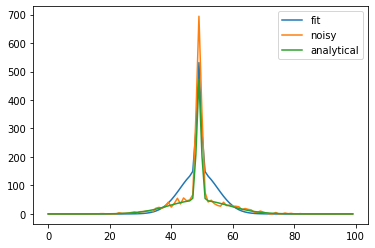

In [84]:
check = data_fitted.reshape(100,100)
row = 47

# analytical solution used curve fitting for origin

analytical_soln = analytical_eq((x,y),*origins[check_indx],*tmp_y_test[check_indx][::-1])
analytical_soln_im = np.reshape(analytical_soln,(length,length))
fit_im = analytical_eq((x, y), *origins[check_indx],*preds[check_indx][::-1])
fit_im = np.reshape(fit_im,(length,length))
ml_im = analytical_eq((x, y), *origins[check_indx],*ml_preds[check_indx][::-1])
ml_im = np.reshape(ml_im,(length,length))

plt.plot(np.arange(len(check[0])),fit_im[row],label = "fit")
plt.plot(np.arange(len(check[0])),tmp_x_test[check_indx,row],label = "noisy")
plt.plot(np.arange(len(check[0])),analytical_soln_im[row],label = "analytical")
# plt.plot(np.arange(len(check[0])),ml_im[row],label = "ml")
plt.legend()

In [82]:
preds[check_indx]

array([3.63461533e+01, 6.38105215e+04])

In [83]:
tmp_y_test[check_indx]

array([   93.65594371, 71141.97624607])

In [49]:
ml_preds[check_indx]

array([   93.55852, 71083.49   ], dtype=float32)

In [17]:
fit_T_rmse = mean_squared_error(preds[:,0],tmp_y_test[:,0],squared = False)
fit_T_rmse

20.168541264344764

In [18]:
fit_N_rmse = mean_squared_error(preds[:,1],tmp_y_test[:,1],squared = False)
fit_N_rmse

2827.408005559926

In [19]:
ml_T_rmse = mean_squared_error(ml_preds[:,0],tmp_y_test[:,0],squared = False)
ml_T_rmse

0.2520388658002403

In [20]:
ml_N_rmse = mean_squared_error(ml_preds[:,1],tmp_y_test[:,1],squared = False)
ml_N_rmse

57.79771140746977

### Checking Residuals

In [21]:
#maybe break up resiudal graphs into based on temp

In [22]:
fit_residuals = preds - tmp_y_test

Text(0.5, 1.0, 'Fit Temperature Residuals')

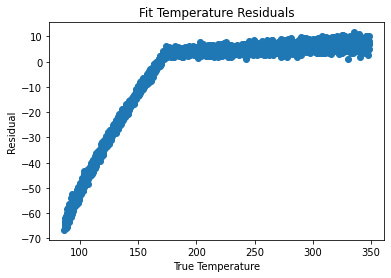

In [23]:
#fit temperature residuals
plt.scatter(tmp_y_test[:,0],fit_residuals[:,0])
plt.xlabel("True Temperature")
plt.ylabel("Residual")
plt.title("Fit Temperature Residuals")

Text(0.5, 1.0, 'Fit Nc Residuals')

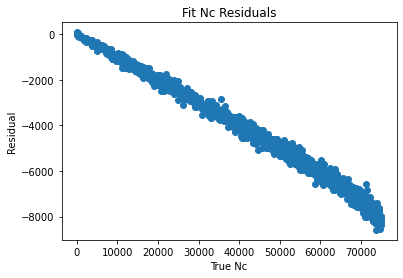

In [24]:
#fit Nc residuals
plt.scatter(tmp_y_test[:,1],fit_residuals[:,1])
plt.xlabel("True Nc")
plt.ylabel("Residual")
plt.title("Fit Nc Residuals")

In [25]:
ml_residuals = ml_preds - tmp_y_test

Text(0.5, 1.0, 'ML Temperature Residuals')

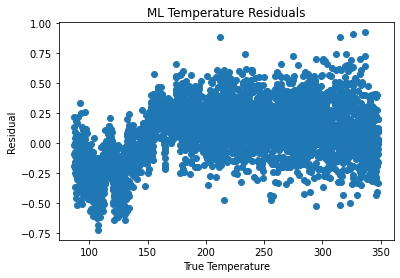

In [26]:
#ml temperature residuals
plt.scatter(tmp_y_test[:,0],ml_residuals[:,0])
plt.xlabel("True Temperature")
plt.ylabel("Residual")
plt.title("ML Temperature Residuals")

Text(0.5, 1.0, 'ML Nc Residuals')

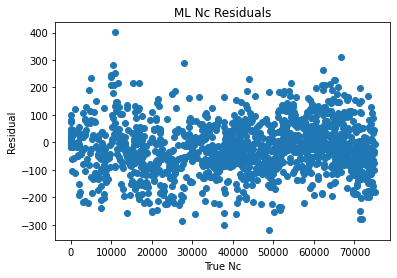

In [27]:
#ML Nc residuals
plt.scatter(tmp_y_test[:,1],ml_residuals[:,1])
plt.xlabel("True Nc")
plt.ylabel("Residual")
plt.title("ML Nc Residuals")

# Testing numpy.random.normal

In [284]:
xl_coord = -49
xr_coord = 50
x = np.linspace(xl_coord, xr_coord, 100)

In [285]:
def simpleGaussian(x,mu,var):
    return (1/np.sqrt(2*math.pi*var))*np.exp(-(x-mu)**2/(2*var))

In [286]:
T = 300
simpleGaussian(0,0,T)

0.023032943298089033

In [287]:
analytical_xs = list(map(simpleGaussian,x,np.zeros(bins),[T for _ in range(bins)]))

In [288]:
analytical_xs = (analytical_xs - np.min(analytical_xs))/np.max(analytical_xs)

In [289]:
analytical_xs.shape

(100,)

In [290]:
bins = 100
samples = 100000
xs = []
for _ in range(samples):
    xs.append(np.random.normal(0,np.sqrt(T)))
xs = np.array(xs)
xs = np.histogram(xs,bins)#range = (xl_coord,xr_coord)) # HERE IS THE ISSUE
xs = xs[0]

In [291]:
xs = (xs - np.min(xs))/np.max(xs)

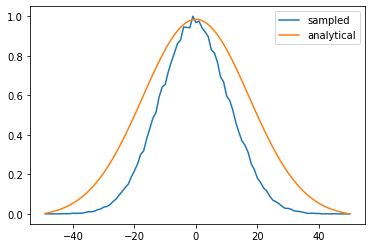

In [292]:
plt.plot(x,xs,label = "sampled")
plt.plot(x,analytical_xs,label = "analytical")
plt.legend()